In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('/Users/yash/VsCode/Data_Anal/full_data.csv')
print(data)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Unique values
 ['Male' 'Female']
Value Counts
 Female    2907
Male      2074
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

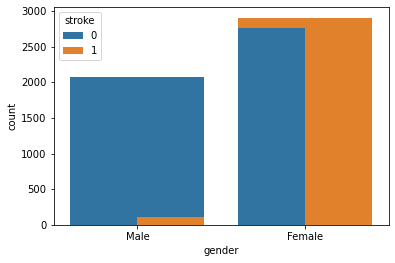

In [6]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())
sns.countplot(data=data,x='gender')
sns.countplot(data=data,x='gender',hue='stroke')

<AxesSubplot:xlabel='stroke', ylabel='age'>

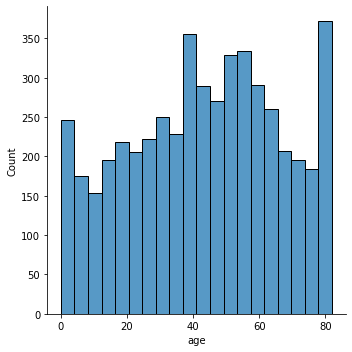

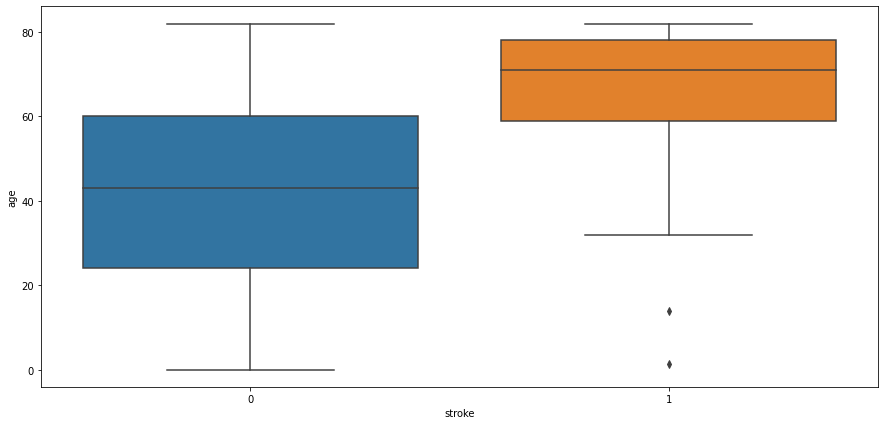

In [7]:
data['age'].nunique()

sns.displot(data['age'])

plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')


<AxesSubplot:xlabel='stroke', ylabel='age'>

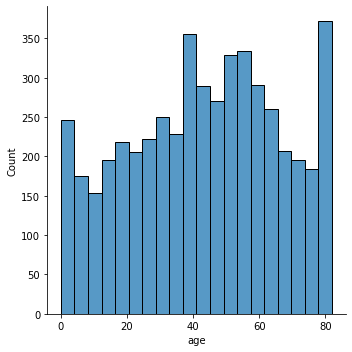

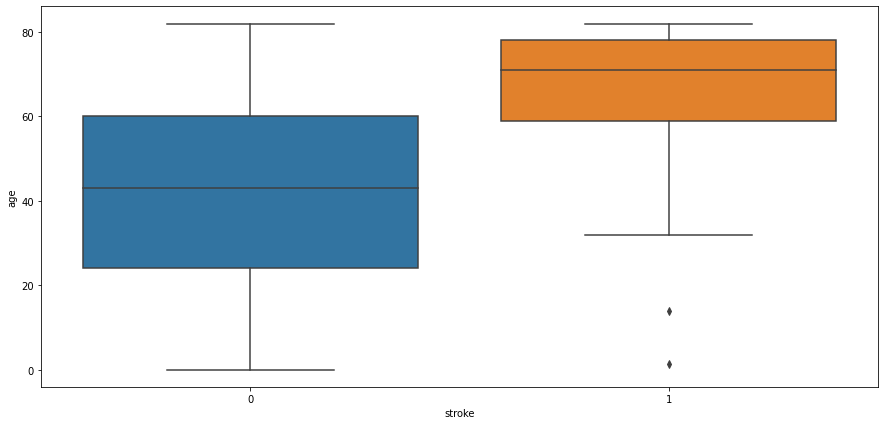

In [8]:
data['age'].nunique()

sns.displot(data['age'])

plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')


Unique Value
 [1 0]
Value Counts
 0    4706
1     275
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

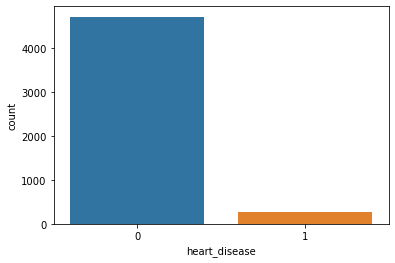

In [9]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())

sns.countplot(data=data,x='heart_disease')



Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3280
No     1701
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

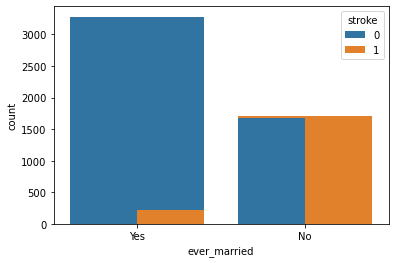

In [10]:
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())

sns.countplot(data=data,x='ever_married')

sns.countplot(data=data,x='ever_married',hue='stroke')


Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children']
Value Counts
 Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

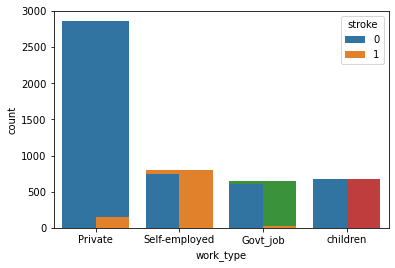

In [11]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())

sns.countplot(data=data,x='work_type')

sns.countplot(data=data,x='work_type',hue='stroke')


Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2532
Rural    2449
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

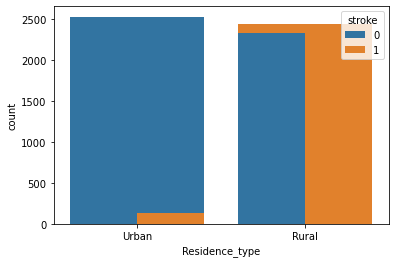

In [12]:
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())

sns.countplot(data=data,x='Residence_type')

sns.countplot(data=data,x='Residence_type',hue='stroke')


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

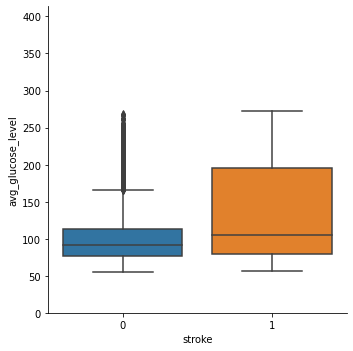

In [13]:
data['avg_glucose_level'].nunique()

sns.displot(data['avg_glucose_level'])

sns.boxplot(data=data,x='stroke',y='avg_glucose_level')


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

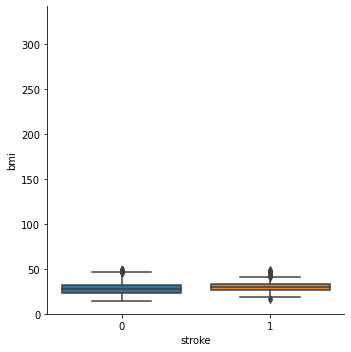

In [14]:
data['bmi'].isna().sum()

data['bmi'].fillna(data['bmi'].mean(),inplace=True)

data['bmi'].nunique()

sns.displot(data['bmi'])

sns.boxplot(data=data,x='stroke',y='bmi')


Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

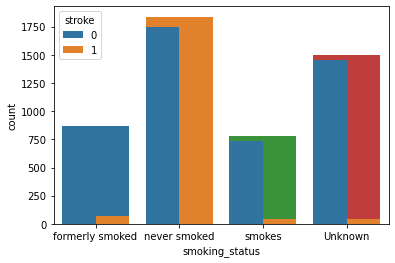

In [15]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())

sns.countplot(data=data,x='smoking_status')

sns.countplot(data=data,x='smoking_status',hue='stroke')


Unique Value
 [1 0]
Value Counts
 0    4733
1     248
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

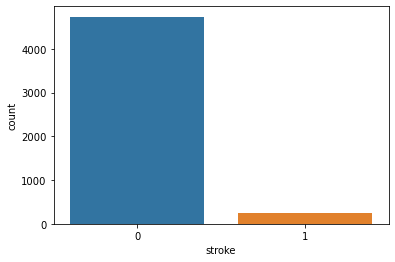

In [16]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

sns.countplot(data=data,x='stroke')


In [17]:
cols=data.select_dtypes(include=['object']).columns
print(cols)

le=LabelEncoder()

data[cols]=data[cols].apply(le.fit_transform)

print(data.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   
5       1  74.0             1              1             1          1   
6       0  69.0             0              0             0          1   
7       0  78.0             0              0             1          1   
8       0  81.0             1              0             1          1   
9       0  61.0             0              1             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

<AxesSubplot:>

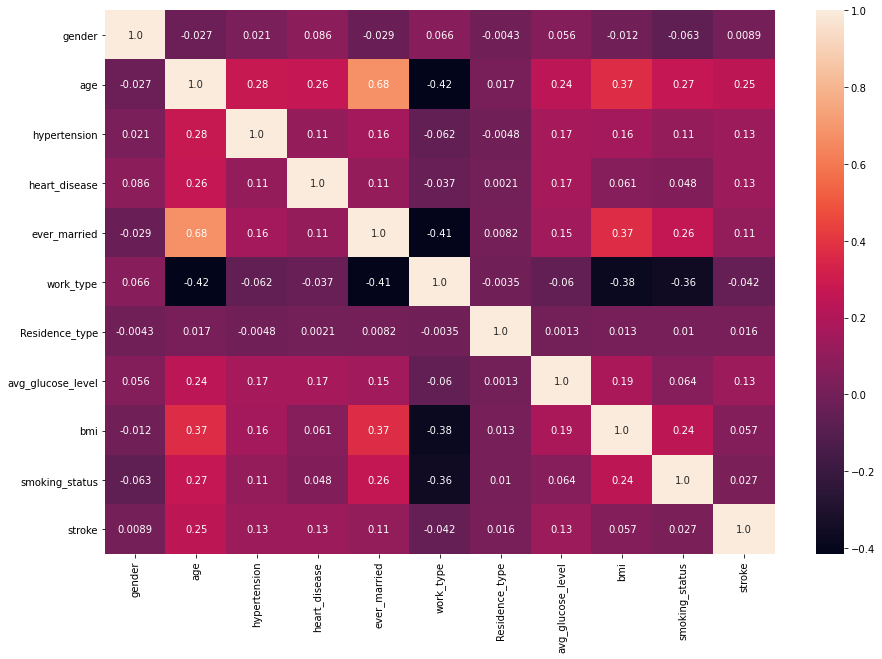

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [19]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,322.045639
3,heart_disease,91.884086
7,avg_glucose_level,89.971820
2,hypertension,88.245189
4,ever_married,59.199605
8,bmi,16.187059
5,work_type,8.729184
9,smoking_status,3.758131
6,Residence_type,1.354940
0,gender,0.391752


In [20]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [21]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)

train_x.shape,test_x.shape,train_y.shape,test_y.shape

((3735, 5), (1246, 5), (3735,), (1246,))

In [22]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

In [23]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7090, 5) (7090,) (2376, 5) (2376,)


In [24]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

Accuracy -->  0.9183501683501684
F1 Score -->  0.9141592920353983
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1304
           1       0.87      0.96      0.91      1072

    accuracy                           0.92      2376
   macro avg       0.92      0.92      0.92      2376
weighted avg       0.92      0.92      0.92      2376

